Name - Tharundi P.D.
Index - 190626H

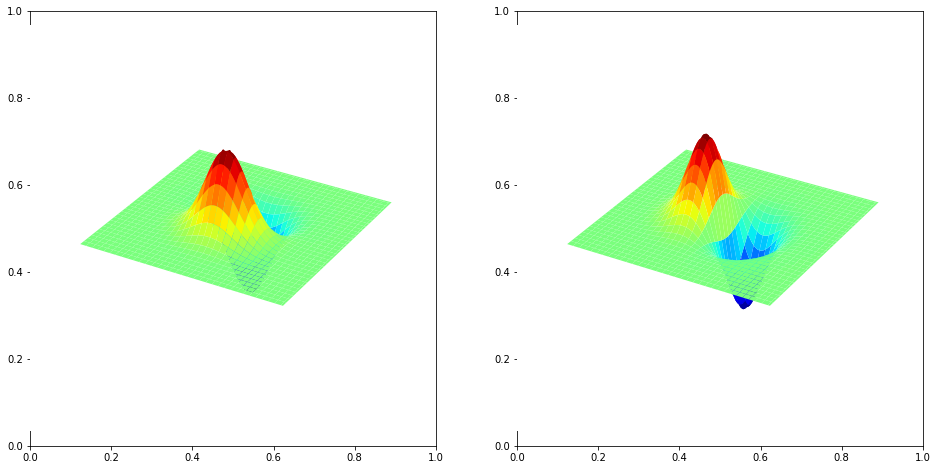

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig , ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

delta = 0.1
xx, yy = np.meshgrid(np.arange(-5, 5+delta, delta), np.arange(-5, 5+delta, delta))

sigma = 1
g = np.exp(-(xx**2+yy**2)/(2*sigma**2))
g/= np.sum(g)
sobel_v = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]], dtype=np.float32)
g_x = cv.filter2D(g, -1, sobel_v)
sobel_h = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]], dtype=np.float32)
g_y = cv.filter2D(g, -1, sobel_h)

surf1 = ax1.plot_surface(xx, yy, g_x, cmap=cm.jet, linewidth = 0, antialiased = True)
surf2 = ax2.plot_surface(xx, yy, g_y, cmap=cm.jet, linewidth = 0, antialiased = True)
ax1.axis('off')
ax2.axis('off')
plt.show()


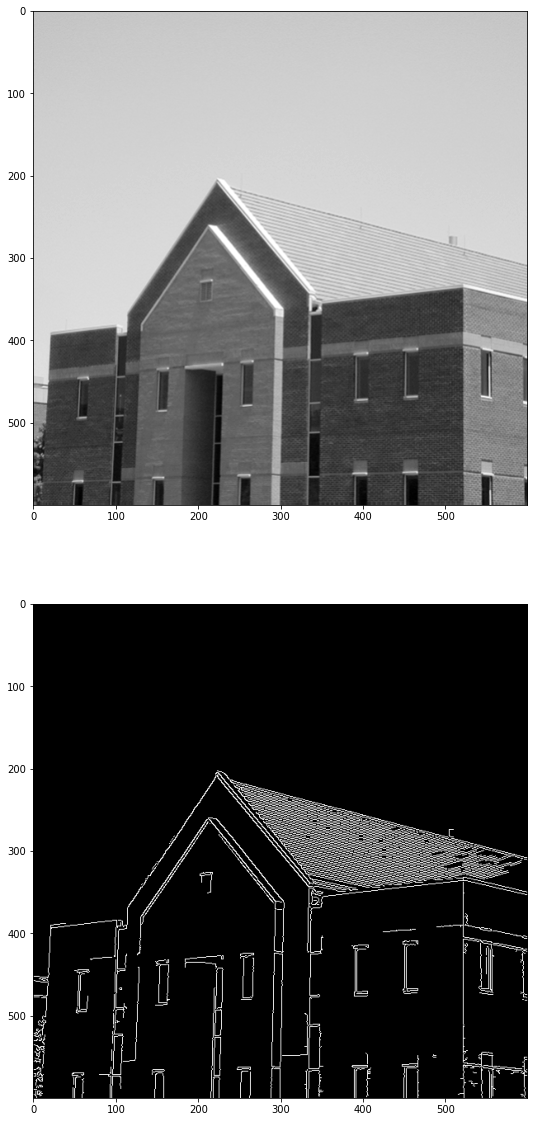

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'building.tif', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im, 100, 200)

fig , ax = plt.subplots(2,1, figsize=(20,20))
ax[0].imshow(im, cmap ='gray')
ax[1].imshow(edges, cmap ='gray')
plt.show()

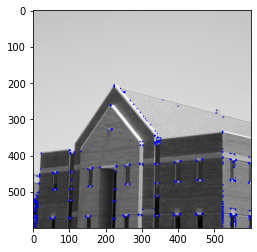

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'building.tif', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)
im[dst > 0.01*dst.max()] = [0,0,255]
cv.imshow('dst', im)
cv.waitKey(0)
cv.destroyAllWindows()
fig , ax = plt.subplots()
ax.imshow(im)
plt.show()

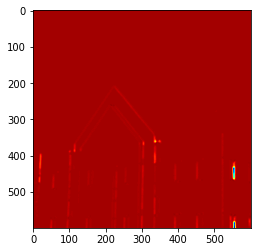

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'building.tif', cv.IMREAD_COLOR)
assert im is not None

I = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]], dtype=np.float32)
sobel_h = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]], dtype=np.float32)

Ix = cv.filter2D(I, -1, sobel_v)
Iy = cv.filter2D(I, -1, sobel_h)

sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)

det = m11*m22 - m12*m21
trace = m11+m22
alpha = 0.04
R = det - alpha*trace**2
#R[R<1e8] = 0
#coordinates = peak_local_max(R, min_distance = 2)


fig , ax = plt.subplots()
ax.imshow(R+127, cmap=cm.jet)
plt.show()